# Daily Active Users Dataset (Dataset 1) - text/csv MIME Type
## Done by Jai
This Jupyter Notebook is used to format the raw datasets used to create our dataset 1, which illustrates the daily active users (DAUs) of Facebook, Twitter and Snapchat. The code here exists all the way until the visualisations and data analysis.

## Dataset 1 Preprocessing

In [200]:
import pandas as pd

In [201]:
# function to format the datasets
def format_dataset(df, name):
    df = df.drop(index=range(4))
    df = df.drop(columns=df.columns[0])
    df.columns = ["Quarters", f"{name}_DAUs"]
    df = df.iloc[-12:, :].reset_index(drop=True)
    return df

The datasets we have are in separate raw .csv files, here we read them in.

In [202]:
# raw dataset filenames
path = "raw_files"
fb_data_filename = "statistic_id346167_facebook_-number-of-daily-active-users-worldwide-2011-2022.xlsx"
twitter_data_filename = "statistic_id970911_twitter_-number-of-monetizable-daily-active-us-users-2017-2022.xlsx"
snap_data_filename = "statistic_id545967_daily-active-users-of-snapchat-2014-2022.xlsx"
sheet_name = "Data"

Code that formats the dataset

In [203]:
# lists
filenames = [fb_data_filename, twitter_data_filename, snap_data_filename]
names = ["Facebook", "Twitter", "Snap"]
new_datasets = list()

# looping through each dataset and formatting using our function
for i in range(len(filenames)):
    file_path = path + "/" + filenames[i]
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    dataset = format_dataset(df, names[i])
    new_datasets.append(dataset)

# merging newly formatted datasets
merged_df = pd.merge(new_datasets[0], new_datasets[1], on='Quarters')
merged_df = pd.merge(merged_df, new_datasets[2], on='Quarters')

# splitting quarter and year
merged_df[['Quarter', 'Year']] = merged_df['Quarters'].str.split(" ", expand=True)
merged_df['Year'] = "20" + merged_df['Year'].str.replace("'", "")
merged_df['Quarter'] = merged_df['Quarter'].str.replace("Q", "")
merged_df = merged_df.drop(columns="Quarters")

merged_df

,Facebook_DAUs,Twitter_DAUs,Snap_DAUs,Quarter,Year
0,1734.0,33.0,229.0,1,2020
1,1785.0,36.0,238.0,2,2020
2,1820.0,36.0,249.0,3,2020
3,1845.0,37.0,265.0,4,2020
4,1878.0,38.0,280.0,1,2021
5,1908.0,37.0,293.0,2,2021
6,1930.0,37.0,306.0,3,2021
7,1929.0,38.0,319.0,4,2021
8,1960.0,39.6,332.0,1,2022
9,1968.0,41.5,347.0,2,2022


Now that we have these rows, we save it to another dataset .csv file

In [204]:
merged_df.to_csv("dataset1.csv", index=False)

We now move on to create such quarterly data on the main dataset

## Main Dataset Preprocessing
This part adds 2 columns to the main dataset that illustrate the quarter and year of a post

In [205]:
df = pd.read_csv("../Master_Dataset_Raw.csv")
df

,Story Primary ID,Story ID,User Primary ID,User ID,Gender,Age,Title,Narrative,Media,Account Created Date,Interest
0,156581,STY1666112066,86625,USR1662300553,NaN,12,Qatar Airways cuts flights to accommodate FIFA...,"<p dir=""ltr"">Qatar Airways&#160;has withdrawn ...",https://image.pixstory.com/Pixstory-image-1666...,2022-09-04 19:39:13,"Technology, History, Food, Entertainment, Spor..."
1,156580,STY1666111954,119236,USR1665943314,NaN,18,Positive thinking does not necessarily mean av...,"<p dir=""ltr"">Positive thinking does not necess...",https://image.pixstory.com/Pixstory-image-1666...,2022-10-16 23:31:54,"Technology, History, Food, Entertainment, Spor..."
2,156579,STY1666111923,86566,USR1662294899,NaN,12,FIFA negotiating 'initiatives' for Qatar migra...,"<p dir=""ltr"">FIFA's president sought Monday to...",https://image.pixstory.com/Pixstory-image-1666...,2022-09-04 18:04:59,"Technology, History, Food, Entertainment, Spor..."
3,156578,STY1666111798,86655,USR1662303432,NaN,12,Qatar ready for the World Cup in just over a m...,"<p dir=""ltr"">Ticket sales for the FIFA World C...",https://image.pixstory.com/Pixstory-image-1666...,2022-09-04 20:27:12,"Technology, History, Food, Entertainment, Spor..."
4,156577,STY1666111463,9221,USR1632727815,male,23,"Froyo always makes everyone happy, make this h...","<p dir=""ltr""></p>\n<p dir=""ltr"">Almost all of ...",https://image.pixstory.com/Pixstory-image-1666...,2021-09-27 13:00:15,"Science, Inequality, Education, Technology, He..."
...,...,...,...,...,...,...,...,...,...,...,...
94995,95021,STY1650382324,22770,USR1642425119,male,40,Ronaldo salta la trasferta di Liverpool,Il Manchester United ha annunciato l'assenza d...,https://image.pixstory.com/Pixstory-image-1650...,2022-01-17 18:41:59,"calcio, premier league, cristiano ronaldo, man..."
94996,95020,STY1650381837,32577,USR1650381467,NaN,15,Name-vishal\nFather name-Amod\nClass-7\nAge-13...,Earthday,https://image.pixstory.com/Pixstory-image-1650...,2022-04-19 20:47:47,chintan
94997,95019,STY1650381574,32498,USR1650370047,NaN,15,Earth day,Name Muskan \nClass 8\nSex f,https://image.pixstory.com/Pixstory-image-1650...,2022-04-19 17:37:27,chintan
94998,95018,STY1650380690,32574,USR1650380153,NaN,12,Name-puneet\nclass-6th\nfather name-Ramkishan\...,Earthday,https://image.pixstory.com/Pixstory-image-1650...,2022-04-19 20:25:53,chintan


We have the main dataset, we have to add needed columns

In [206]:
# convert datetime
df['Account Created Date'] = pd.to_datetime(df['Account Created Date'])

# Create new columns for year and quarter using the 'Datetime' column
df['Year'] = df['Account Created Date'].dt.year
df['Quarter'] = df['Account Created Date'].dt.quarter
df["Year_Quarter"] = df['Year'].astype(str) + '_' + df['Quarter'].astype(str)

# open dataset 2, our DAUs
df2 = pd.read_csv("dataset1.csv")
df2["Year_Quarter"] = df2['Year'].astype(str) + '_' + df2['Quarter'].astype(str)
df2 = df2.drop(columns=["Quarter", "Year"])

# merge the 2
merged_df = pd.merge(df, df2, how='left', on='Year_Quarter')

merged_df

,Story Primary ID,Story ID,User Primary ID,User ID,Gender,Age,Title,Narrative,Media,Account Created Date,Interest,Year,Quarter,Year_Quarter,Facebook_DAUs,Twitter_DAUs,Snap_DAUs
0,156581,STY1666112066,86625,USR1662300553,NaN,12,Qatar Airways cuts flights to accommodate FIFA...,"<p dir=""ltr"">Qatar Airways&#160;has withdrawn ...",https://image.pixstory.com/Pixstory-image-1666...,2022-09-04 19:39:13,"Technology, History, Food, Entertainment, Spor...",2022,3,2022_3,1984.0,42.3,363.0
1,156580,STY1666111954,119236,USR1665943314,NaN,18,Positive thinking does not necessarily mean av...,"<p dir=""ltr"">Positive thinking does not necess...",https://image.pixstory.com/Pixstory-image-1666...,2022-10-16 23:31:54,"Technology, History, Food, Entertainment, Spor...",2022,4,2022_4,2000.0,43.1,377.0
2,156579,STY1666111923,86566,USR1662294899,NaN,12,FIFA negotiating 'initiatives' for Qatar migra...,"<p dir=""ltr"">FIFA's president sought Monday to...",https://image.pixstory.com/Pixstory-image-1666...,2022-09-04 18:04:59,"Technology, History, Food, Entertainment, Spor...",2022,3,2022_3,1984.0,42.3,363.0
3,156578,STY1666111798,86655,USR1662303432,NaN,12,Qatar ready for the World Cup in just over a m...,"<p dir=""ltr"">Ticket sales for the FIFA World C...",https://image.pixstory.com/Pixstory-image-1666...,2022-09-04 20:27:12,"Technology, History, Food, Entertainment, Spor...",2022,3,2022_3,1984.0,42.3,363.0
4,156577,STY1666111463,9221,USR1632727815,male,23,"Froyo always makes everyone happy, make this h...","<p dir=""ltr""></p>\n<p dir=""ltr"">Almost all of ...",https://image.pixstory.com/Pixstory-image-1666...,2021-09-27 13:00:15,"Science, Inequality, Education, Technology, He...",2021,3,2021_3,1930.0,37.0,306.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94995,95021,STY1650382324,22770,USR1642425119,male,40,Ronaldo salta la trasferta di Liverpool,Il Manchester United ha annunciato l'assenza d...,https://image.pixstory.com/Pixstory-image-1650...,2022-01-17 18:41:59,"calcio, premier league, cristiano ronaldo, man...",2022,1,2022_1,1960.0,39.6,332.0
94996,95020,STY1650381837,32577,USR1650381467,NaN,15,Name-vishal\nFather name-Amod\nClass-7\nAge-13...,Earthday,https://image.pixstory.com/Pixstory-image-1650...,2022-04-19 20:47:47,chintan,2022,2,2022_2,1968.0,41.5,347.0
94997,95019,STY1650381574,32498,USR1650370047,NaN,15,Earth day,Name Muskan \nClass 8\nSex f,https://image.pixstory.com/Pixstory-image-1650...,2022-04-19 17:37:27,chintan,2022,2,2022_2,1968.0,41.5,347.0
94998,95018,STY1650380690,32574,USR1650380153,NaN,12,Name-puneet\nclass-6th\nfather name-Ramkishan\...,Earthday,https://image.pixstory.com/Pixstory-image-1650...,2022-04-19 20:25:53,chintan,2022,2,2022_2,1968.0,41.5,347.0


We then save our (6) new columns to the main dataset.

In [207]:
merged_df.to_csv("../Master_Dataset_Raw_V2.csv", index=False)

With that, we are done with our formats and data preprocessing.

## Visualisation 1
We first create DAUs for PixStory to help with our visualisation and analysis

In [208]:
# group the data by 'QUARTER' and count the number of unique values in 'USER_ID' within each group
unique_user_counts = merged_df.groupby('Year_Quarter')['User ID'].nunique()
counts_df = unique_user_counts.to_frame().reset_index()
counts_df.columns = ['Year_Quarter', 'PixStory_DAUs']

merged_df2 = pd.merge(df2, counts_df, how='left', on='Year_Quarter')

merged_df2

,Facebook_DAUs,Twitter_DAUs,Snap_DAUs,Year_Quarter,PixStory_DAUs
0,1734.0,33.0,229.0,2020_1,2.0
1,1785.0,36.0,238.0,2020_2,NaN
2,1820.0,36.0,249.0,2020_3,NaN
3,1845.0,37.0,265.0,2020_4,29.0
4,1878.0,38.0,280.0,2021_1,84.0
5,1908.0,37.0,293.0,2021_2,55.0
6,1930.0,37.0,306.0,2021_3,81.0
7,1929.0,38.0,319.0,2021_4,181.0
8,1960.0,39.6,332.0,2022_1,6700.0
9,1968.0,41.5,347.0,2022_2,1070.0


We then import visualisation and standardisation tools

In [209]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

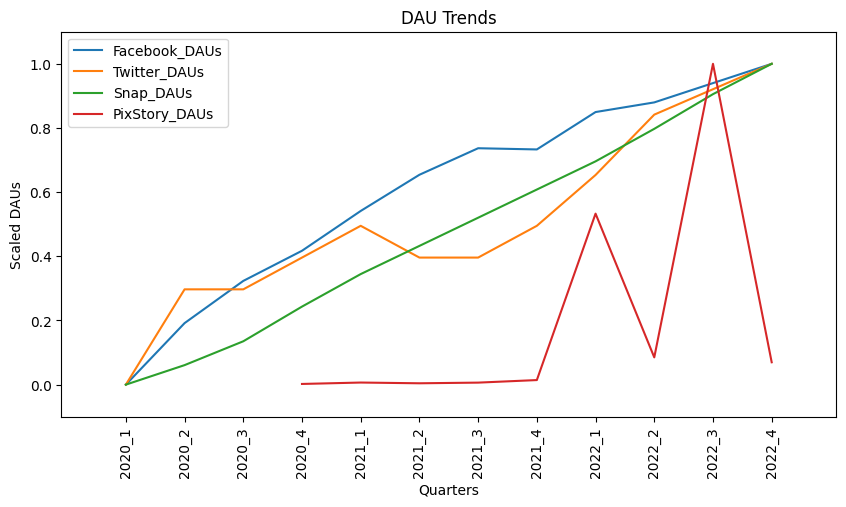

In [210]:
cols_to_scale = ['Facebook_DAUs', 'Twitter_DAUs', 'Snap_DAUs', 'PixStory_DAUs']
scaler = MinMaxScaler()
merged_df2[cols_to_scale] = scaler.fit_transform(merged_df2[cols_to_scale])

fig, ax = plt.subplots()
for col in cols_to_scale:
    ax.plot(merged_df2['Year_Quarter'], merged_df2[col], label=col)


# tidy up and save the figure

ax.legend()
plt.xticks(rotation=90)
plt.xlabel('Quarters')
plt.ylabel('Scaled DAUs')
plt.title('DAU Trends')

plt.margins(0.1)
plt.gcf().set_size_inches(10, 5)
plt.savefig('visualisation1.png', bbox_inches='tight')


plt.show()

As can be seen from this visualisation, there is not much correlation in the trends of PixStory DAUs and the DAUs of other companies such as Facebook, Twitter and Snapchat. While this is not a solid answer to our question, we can interpret this data to say that users generally being online on other social media platforms do not necessarily translate into users being online on PixStory